# Tarea #2: Los buenos ejemplos se copian

Para esta tarea trataremos de reproducir dos visualizaciones del The Economist. Para ellos nos enfocaremos en imitar la paleta de colores que ocuparon, las visualizaciones y las anotaciones que incluyen en los gráficos, además de todos los otros detalles de título, subtítulo, etcétera.

## Problema 1: Behavioural finance

In [142]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.font_manager as fm
from matplotlib import lines

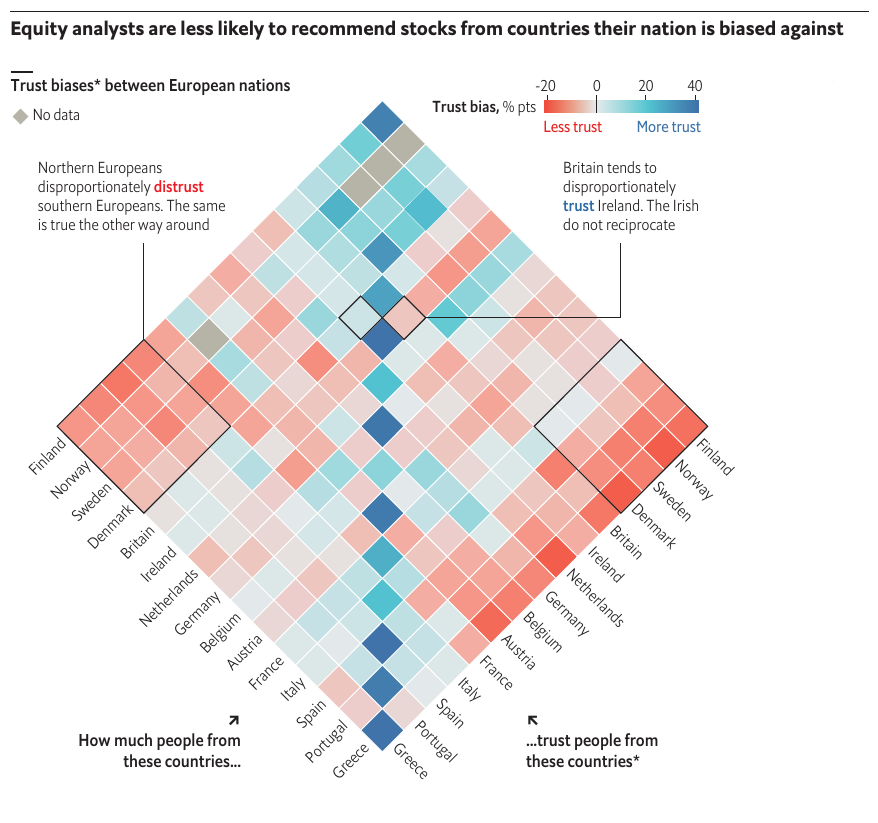

In [143]:
Image("./images/01-behavioural-finance.png")

### Datos

Los datos fueron sacados de [este paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3153900) (Table IA.I). Como la idea de esta tarea no es enfocarse en la extracción de datos, el archivo `csv` con los datos de la tabla ya son entregados en `data/01-behavioural-finance.csv`

### Ayuda 1

[Esta herramienta](https://eltos.github.io/gradient/) puede ser sumamente útil para extraer la paleta de colores y crear un colormap con esos valores. Una vez que se han elegido los colores, la paleta puede ser cargada de la siguiente forma

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
import pandas as pd

In [144]:

my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:E72E2E-28.4:E8B4A4-33.4:E3E9EB-38.4:BBE0E3-67:57C6D1-100:326FA8
    (0.000, (0.906, 0.180, 0.180)),
    (0.284, (0.910, 0.706, 0.643)),
    (0.34, (0.890, 0.914, 0.922)),
    (0.384, (0.733, 0.878, 0.890)),
    (0.670, (0.341, 0.776, 0.820)),
    (1.000, (0.196, 0.435, 0.659))))

gris_null = "#B5B4A6"
my_gradient.set_bad(gris_null)

### Ayuda 2

Una de las partes más difíciles de esta tarea puede ser rotar el gráfico. Como la idea de la tarea es ejercitar otro tipo de habilidades, aquí se entrega una función que permitirá rotar el gráfico.

In [145]:
df_fig1 = pd.read_csv('./data/01-behavioural-finance.csv')

Abajo se da un ejemplo de cómo utilizar la función dado un dataframe `df`. De ahí en adelante, el axis que se modifica es `ax0`.

In [146]:
paises_fig1 = ['Gre', 'Por', 'Spa', 'Ita', 'Fra', 'Aus', 'Bel', 'Ger', 'NL', 'Ire', 'UK', 'Den', 'Swe', 'Nor', 'Fin']
map_paises_fig1={
    'Gre': 'Greece',
    'Por': 'Portugal',
    'Spa': 'Spain',
    'Ita': 'Italy',
    'Fra': 'France',
    'Aus': 'Austria',
    'Bel': 'Belgium',
    'Ger': 'Germany',
    'NL' : 'Netherlands',
    'Ire': 'Ireland',
    'UK' : 'Britain',
    'Den': 'Denmark',
    'Swe': 'Sweden',
    'Nor': 'Norway',
    'Fin': 'Finland'
}

In [147]:
df_fig1 = df_fig1[['Origin of trust'] + paises_fig1]
df_fig1['Origin of trust'] = pd.Categorical(df_fig1['Origin of trust'], categories=paises_fig1, ordered=True)
df_fig1 = df_fig1.sort_values('Origin of trust').drop(columns='Origin of trust')
df_fig1.columns = df_fig1.columns.map(map_paises_fig1)
df_fig1.index = df_fig1.columns
df_fig1 = (df_fig1*100)

In [212]:
# Parametros:
# ---------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------
# Fuentes:
# --------
# Ruta al archivo de fuente
font_path_noto2 = 'Noto_Sans_Symbols_2/NotoSansSymbols2-Regular.ttf' 
font_path_latoBlack = 'Lato/Lato-Black.ttf' 
font_path_latoB = 'Lato/Lato-Bold.ttf' 
font_path_latoR = 'Lato/Lato-Regular.ttf'
font_path_nunito7CR = 'Nunito_Sans/NunitoSans_7pt_Condensed-Regular.ttf' 
font_path_nunito7CI = 'Nunito_Sans/NunitoSans_7pt_Condensed-Italic.ttf' 

# Cargar la fuente desde el archivo
prop_noto2 = fm.FontProperties(fname=font_path_noto2)
prop_latoBlack = fm.FontProperties(fname=font_path_latoBlack)
prop_latoB = fm.FontProperties(fname=font_path_latoB)
prop_latoR = fm.FontProperties(fname=font_path_latoR)
prop_nunito7CR = fm.FontProperties(fname=font_path_nunito7CR)
prop_nunito7CI = fm.FontProperties(fname=font_path_nunito7CI)

# Colores:
# --------
# Colores comunes
gris_claro_texto = '#555555'
gris_oscuro_texto = '#333333'
gris_oscuro_lineas = '#333333'

# Colores Fig 1
red_20_ = "#E72E2E"
blank_0 = "#E3E9EB"
blue_20 = "#57C6D1"
blue_40 = "#326FA8"
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:E72E2E-28.4:E8B4A4-33.4:E3E9EB-38.4:BBE0E3-67:57C6D1-100:326FA8
    (0.000, (0.906, 0.180, 0.180)),
    (0.284, (0.910, 0.706, 0.643)),
    (0.34, (0.890, 0.914, 0.922)),
    (0.384, (0.733, 0.878, 0.890)),
    (0.670, (0.341, 0.776, 0.820)),
    (1.000, (0.196, 0.435, 0.659))))

gris_null = "#B5B4A6"
my_gradient.set_bad(gris_null)

#Funciones:
# ---------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------
# Figura 1:
# --------
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df_fig1.shape[0], 0, df_fig1.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

def draw_rombo(pos_x0, pos_y0, r_alfa, facecolor):
    r_d1 = 0.015*r_alfa
    r_d2 = 0.01*r_alfa
    rombo = patches.Polygon([[pos_x0, pos_y0], [pos_x0+r_d1*0.5, pos_y0+r_d2], [pos_x0+r_d1, pos_y0], [pos_x0+r_d1*0.5, pos_y0-r_d2]],facecolor=facecolor)
    return rombo

def cbar_adjust_fig1(fig, hm, pos=[0.6, 0.85, 0.3, 0.13]):
    cbar_ax = fig.add_axes(pos)
    cbar = fig.colorbar(hm.collections[0], ax=cbar_ax, orientation='horizontal', pad=-0.2, aspect=9)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.set_ticks([-20, 0, 20, 40])
    cbar.set_ticklabels([-20, 0, 20, 40], fontproperties=prop_latoR, fontsize=10, color=gris_claro_texto)
    cbar.ax.tick_params(colors=gris_oscuro_lineas) 
    cbar.outline.set_visible(False)
    cbar.ax.vlines(x=0.0, ymin=0, ymax=1, colors=gris_oscuro_lineas, linewidth=0.8)
    cbar_ax.set_axis_off()
    cbar_ax.text(0.225, 0.11, "Trust bias,           ", ha='right', va='center', color=gris_oscuro_texto,
                 fontsize=11, weight=900, fontproperties=prop_latoB)
    cbar_ax.text(0.255, 0.11, "% pts ", ha='right', va='center', color=gris_claro_texto,
                 fontsize=11, weight=900, fontproperties=prop_latoR)
    cbar_ax.text(0.265, -0.05, "Less trust", ha='left', va='center', color=red_20_,
                 fontsize=9, weight=700, fontproperties=prop_latoB)
    cbar_ax.text(0.735, -0.05, "More trust", ha='right', va='center', color=blue_40,
                 fontsize=9, weight=700, fontproperties=prop_latoB)
    
def heatmap_fig1(df, ax):
    mask = df.isna()
    hm = sns.heatmap(df, mask=mask, cmap=my_gradient, linewidths=0.5, linecolor='white', cbar=False,
                vmin=-22, vmax=42, alpha=1, ax=ax, annot=False)

    # Asigna xticks labels 
    for t in ax.get_xticklabels():
        ax.text(t.get_position()[0]-0.1, t.get_position()[1] + 0.1, t.get_text(), 
                rotation=-45, ha='left', va='top', fontsize=10, weight='light', 
                color=gris_claro_texto, fontproperties=prop_latoR)
        
    for t in ax.get_yticklabels():
        ax.text(t.get_position()[0]+0.1, t.get_position()[1]-0.05, t.get_text(), 
                rotation=45, ha='right', va='top', fontsize=10, weight='light', 
                color=gris_claro_texto, fontproperties=prop_latoR)
    return hm

def rectangles_heatmap_fig1(ax, pos_list):
    for pos in pos_list:
        rect_ = patches.Rectangle((pos[0], pos[1]), pos[2], pos[3], linewidth=1, edgecolor=gris_oscuro_lineas, facecolor='none')
        ax.add_patch(rect_)

def text_bottom_heatmap_fig1(ax):
    ax.text(3, -3, "...trust people from \nthese countries*", ha='left', va='center',
         fontsize=11, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB, linespacing=1.4)

    ax.text(4, -3, "🡴", ha='right', va='bottom',
            fontsize=12, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)

    ax.text(-3.5, 3.5, "How much people from\n    these countries...", ha='right', va='center',
            fontsize=11, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB, linespacing=1.4)

    ax.text(-3, 4, "🡵", ha='right', va='bottom',
            fontsize=12, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)
    
def annotate_top_heatmap_fig1(ax, pos_izq, pos_der, pos_annotate_izq, pos_annotate_der, ls=[1,1], fontsize=10):
    # Izquierda
    ax.text(pos_izq[0], pos_izq[1], 
            "Britain tends to \ndisproportionately\n            Ireland. The Irish\ndo not reciprocate",
            ha='left', va='top', fontsize=fontsize, weight=900, color=gris_claro_texto, fontproperties=prop_latoR, linespacing=ls[0])
    ax.text(pos_izq[0], pos_izq[1],
            "                 \n                  \ntrust",
            ha='left', va='top', fontsize=fontsize, weight=900, color=blue_40, fontproperties=prop_latoB, linespacing=ls[0])
    ax.annotate('', xy=pos_annotate_izq[0], xytext=pos_annotate_izq[1],
                 arrowprops=dict(arrowstyle="-", connectionstyle="angle,angleA=90,angleB=0,rad=0", color=gris_oscuro_lineas), linespacing=ls[0])
    # Derecha
    ax.text(pos_der[0], pos_der[1], 
            "Northern Europeans \ndisproportionately         \nsouthern Europeans. The same\nis true the other way around",
            ha='left', va='top', fontsize=fontsize, weight=900, color=gris_claro_texto, fontproperties=prop_latoR, linespacing=ls[1])
    ax.text(pos_der[0], pos_der[1], 
            "\n                                             distrust",
            ha='left', va='top', fontsize=fontsize, weight=900, color=red_20_, fontproperties=prop_latoB, linespacing=ls[1])
    ax.annotate('', xy=pos_annotate_der[0], xytext=pos_annotate_der[1],     
        arrowprops=dict(arrowstyle="-", connectionstyle="angle,angleA=90,rad=0", color=gris_oscuro_lineas), linespacing=ls[1])
    
def subtitle_fig1(fig, ax, pos_line_sub, lw_line_sub, posx_text_sub, posy_text_sub, pos_x0, pos_y0, r_alfa):
    fig.add_artist(
        lines.Line2D([pos_line_sub[0], pos_line_sub[0] + 0.03], [pos_line_sub[1], pos_line_sub[1]], lw=lw_line_sub, color=gris_oscuro_lineas,
                     solid_capstyle="butt", transform=ax.transAxes))
    fig.text(posx_text_sub, posy_text_sub, "Trust biases* between European nations",
            ha='left', va='top', fontsize=11, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoBlack)

    rombo = draw_rombo(pos_x0, pos_y0, r_alfa, gris_null)
    ax.add_patch(rombo)
    ax.text(pos_x0+0.022, pos_y0, "No data", ha='left', va='center', fontsize=11, weight=900, 
            color=gris_claro_texto, fontproperties=prop_latoR)

def title_fig1(fig, ax, posx_line_title, posy_line_title, lw_line_title, pos_x0_title, pos_y0_title):
    fig.add_artist(
        lines.Line2D(posx_line_title, posy_line_title, lw=lw_line_title, color=gris_oscuro_lineas,
                    solid_capstyle="butt", transform=ax.transAxes))
    fig.text(pos_x0_title, pos_y0_title, "Equity analysts are less likely to recommend stocks from countries their nation is biased against",
            ha='left', va='top', fontsize=13.1, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoBlack)
    
def draw_fig1(fig, ax):
    # Rota ejes
    ax0 = rotate_axes(fig, 111,45)
    # Crea Heatmap
    hm = heatmap_fig1(df_fig1, ax0)
    # Crea color bar
    cbar_adjust_fig1(fig, hm, pos=[0.6-0.01, 0.85, 0.3, 0.13])
    # Crea recuadros
    pos_list = [[11, 0, 4, 4], [0, 11, 4, 4], [9, 10, 1, 1], [10, 9, 1, 1]]
    rectangles_heatmap_fig1(ax0, pos_list)
    # Crea textos parte baja
    text_bottom_heatmap_fig1(ax0)
    # Anotaciones parte superior izquierda
    pos_izq = [17.8, 9.2]
    pos_der = [5.3, 21.7]
    pos_annotate_izq = [(10.95, 9.05), (17.5, 6.2)]
    pos_annotate_der = [(6.4, 17.4), (3.95, 14.95)]
    annotate_top_heatmap_fig1(ax0, pos_izq, pos_der, pos_annotate_izq, pos_annotate_der, ls=[1.4,1.4], fontsize=10)
    # Subtitulo
    pos_line_sub = [0.045, 1.035]
    lw_line_sub = 1.5
    posx_text_sub = 0.16
    posy_text_sub = 0.9
    pos_x0_sub = 0.045
    pos_y0_sub = 0.98
    r_alfa = 1.2
    subtitle_fig1(fig, ax, pos_line_sub, lw_line_sub, posx_text_sub, posy_text_sub, pos_x0_sub, pos_y0_sub, r_alfa)
    # Titulo
    posx_line_title = [0.045, 1.091]
    posy_line_title = [1.13, 1.13]
    lw_line_title = 1
    pos_x0_title = 0.16
    pos_y0_title = 0.97
    title_fig1(fig, ax, posx_line_title, posy_line_title, lw_line_title, pos_x0_title, pos_y0_title)

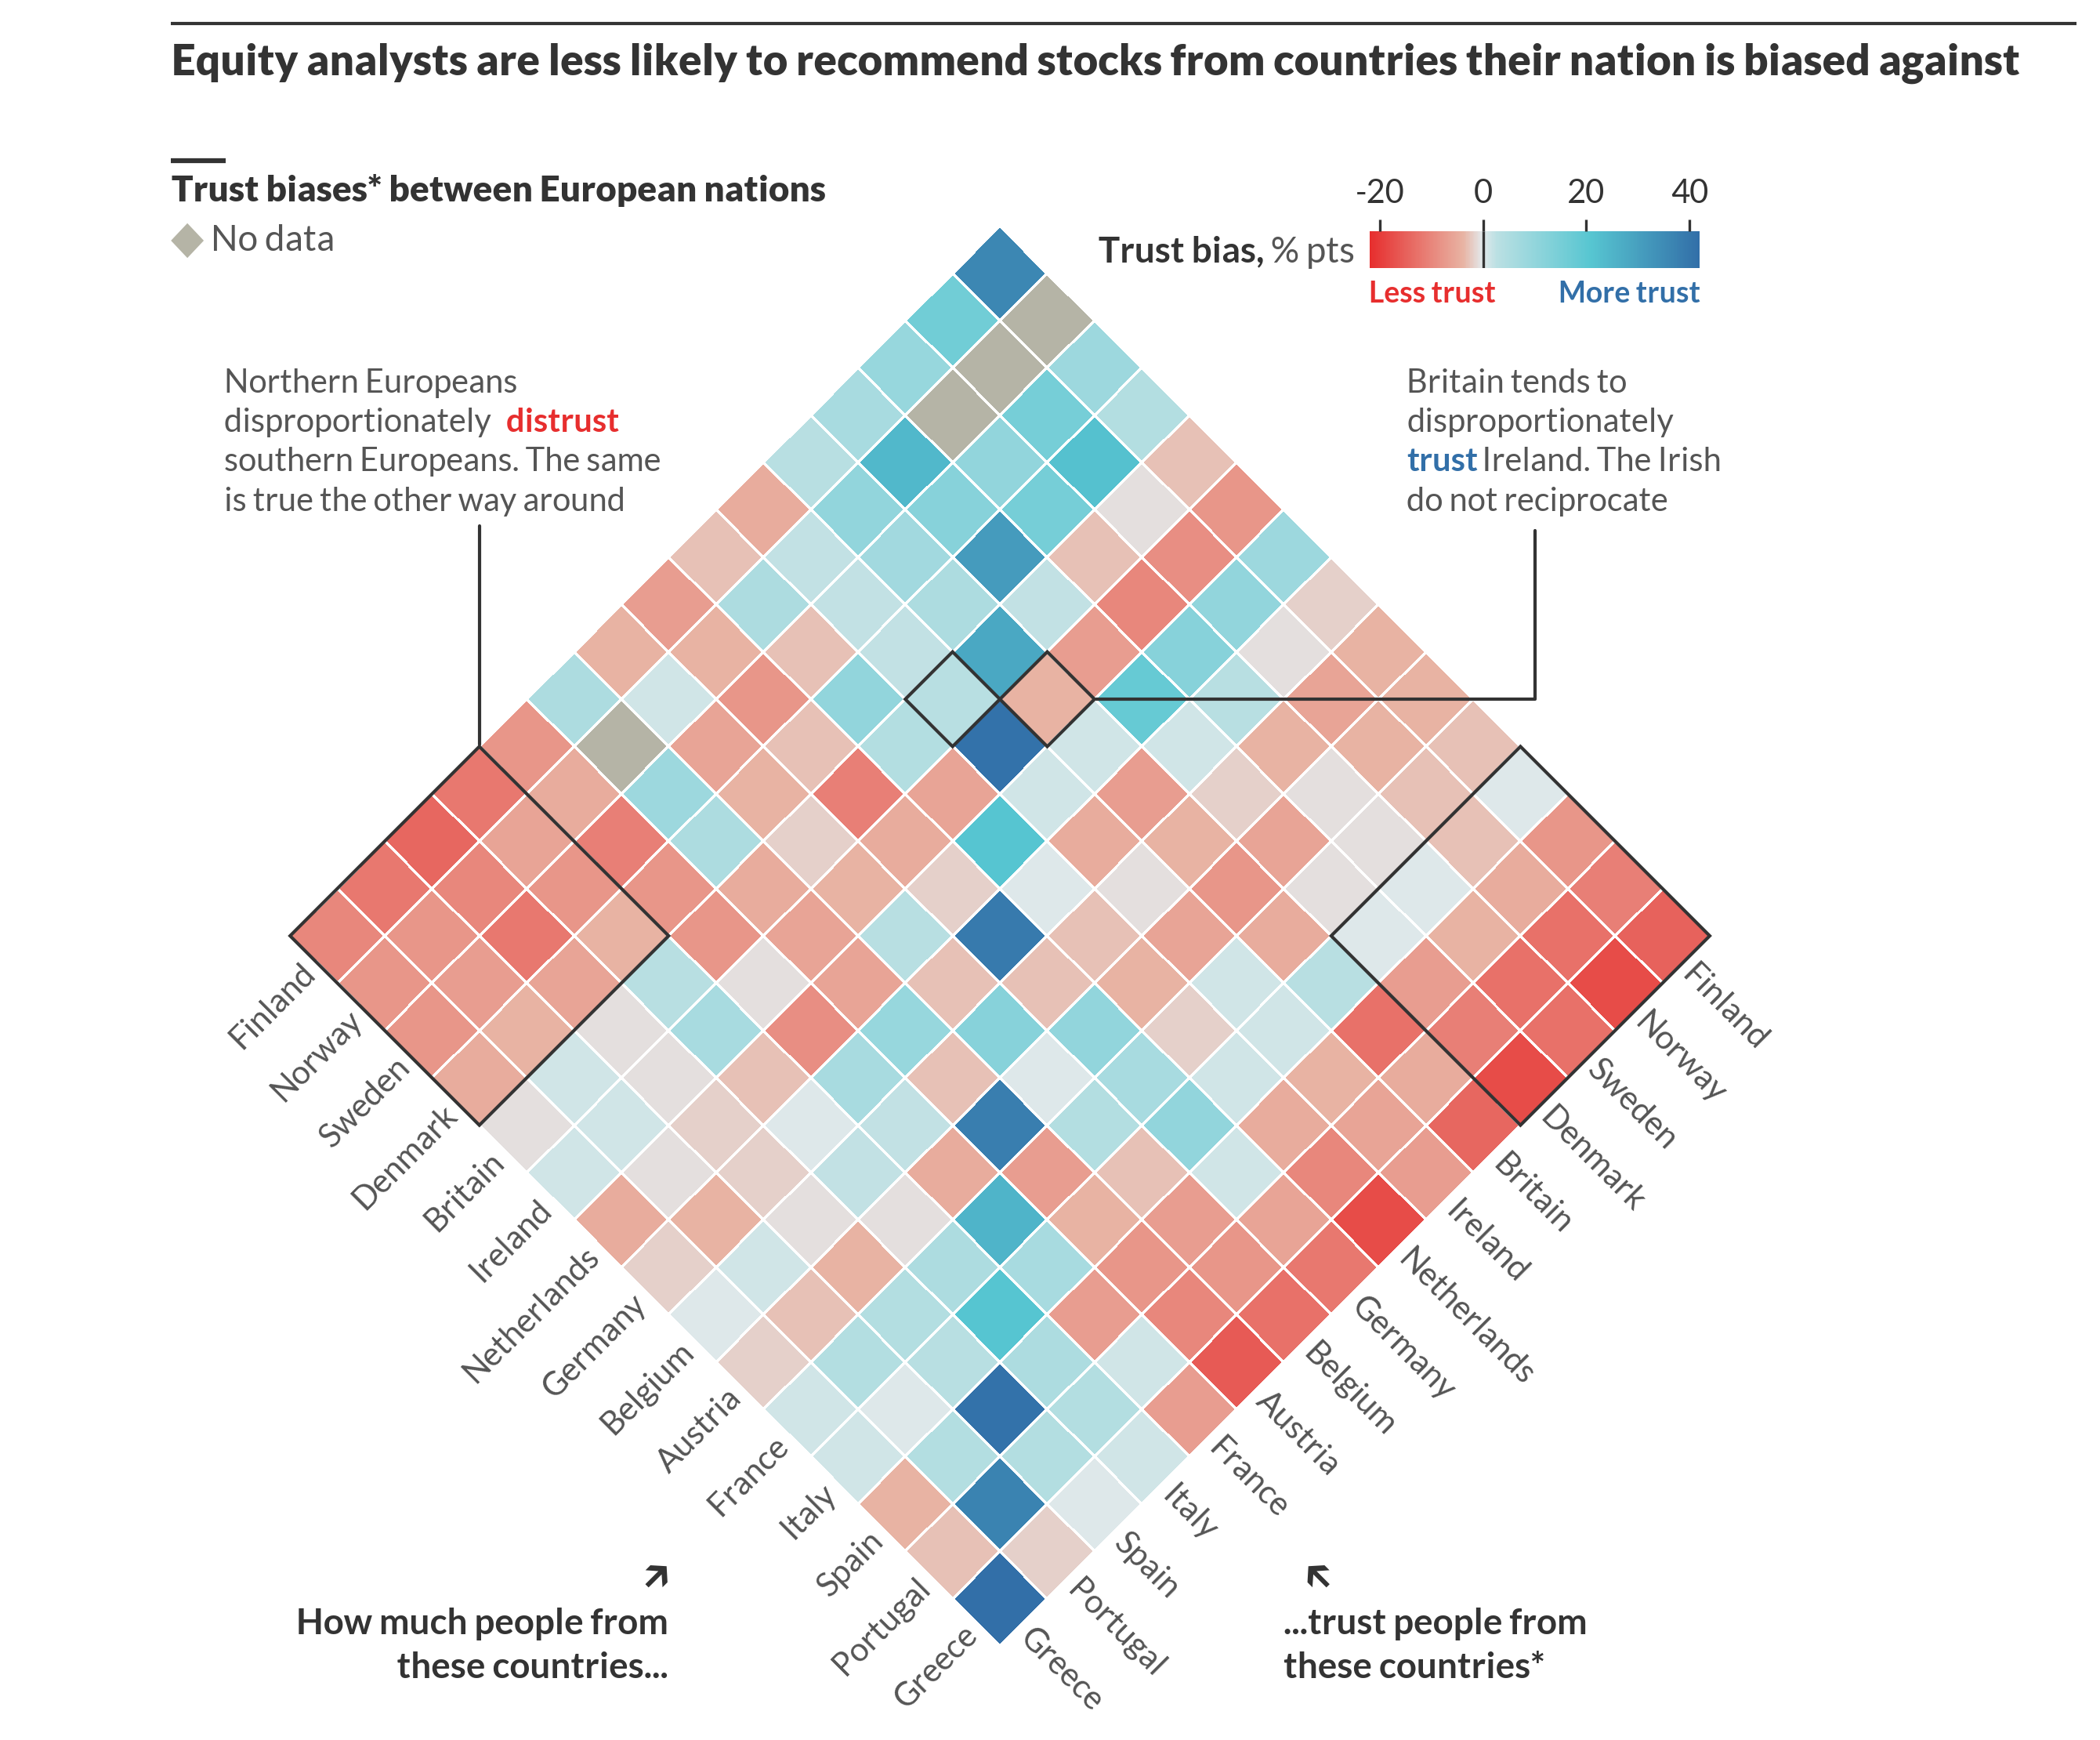

In [216]:
# Para que esta celda pueda correr hay que definir df, crear el colormap my_gradient e importar sns
fig, ax = plt.subplots(1,1, figsize=(10, 8), dpi=300)
draw_fig1(fig, ax)
ax.set_axis_off()
plt.show()

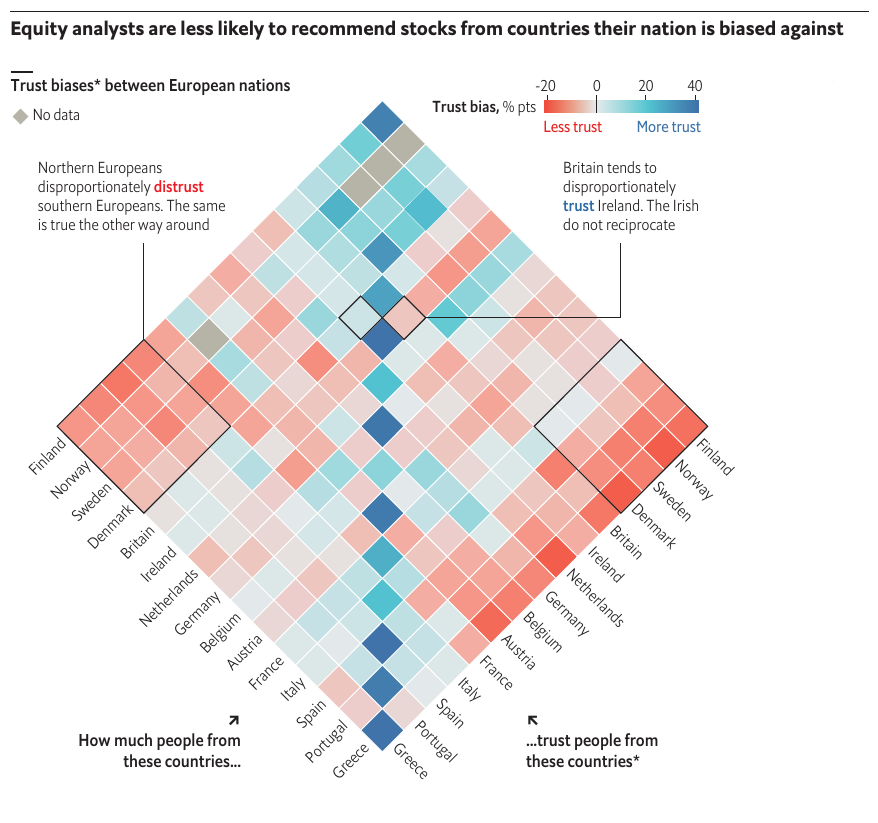

In [214]:
Image("./images/01-behavioural-finance.png")

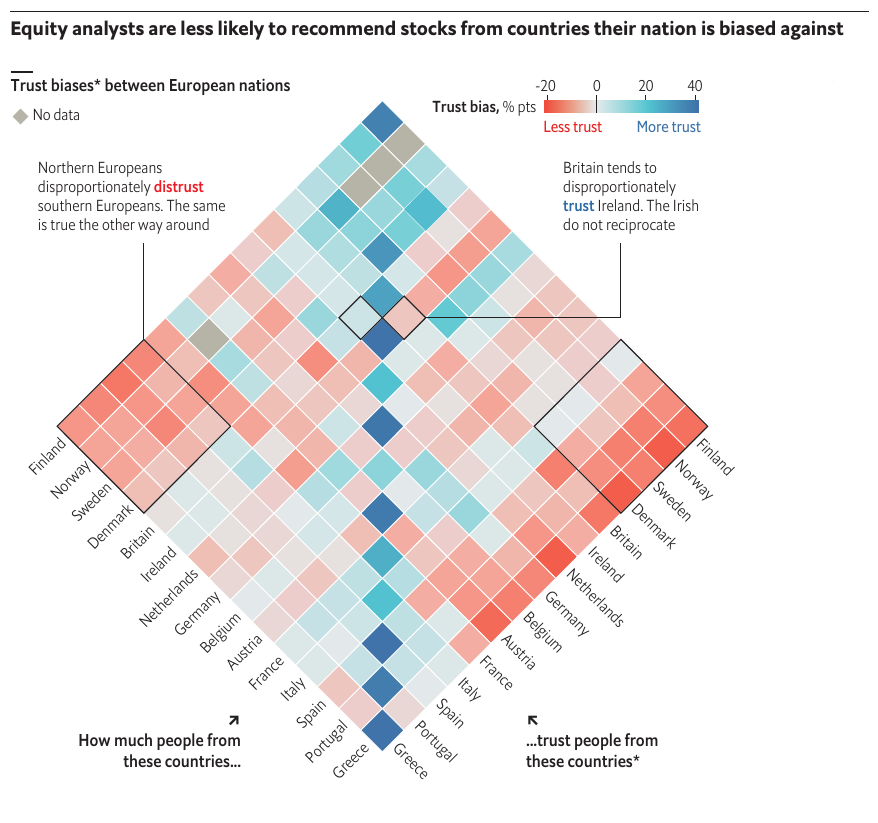

In [215]:
Image("./images/01-behavioural-finance.png")